## EXPLORATORY DATA ANALYSIS REPORT

## Table of Contents
* [1. Package & Data Import](#chapter1)
* [2.  Dataset Analysis](#chapter2)
    * [2.1 Missing Values](#chapter2.1)
    * [2.2 Nr. Policies](#chapter2.2)
    * [2.3 Retention Analysis](#chapter2.3)
* [3. Visualizations](#chapter3)
    * [3.1 Variable selection by data type](#chapter3.1)
    * [3.2 Plot categorical and integer variables](#chapter3.2)
    * [3.3 Plot Numercial Variables](#chapter3.3)
    * [3.4 Plots by target](chapter3.4)
    * [3.5 Outlier detection](#chapter3.5)
* [4. Correlation Analysis](#chapter4)
* [5. Other Analysis](#chapter5)
    * [5.1 Mean values of number of policies by agent](#chapter5.1)

## 1. Package & Data Import <a class="anchor" id="chapter1"></a>
---
Package import and selection of data frame to import. The data analysed is comprised of 9 different portfolios from June (201906) through March (202003) of 2019 & 2020

In [1]:
# basic packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:
from utilis.aux_functions_pre_proc import check_missings # initial analysis
from utilis.aux_functions_pre_proc import remove_outliers, visualize_outliers, visualize_tgt_by_categorical, tgt_dist, tgt_dist_violin, tgt_dist_barplots, tgt_dist_countplots # visualizations
from utilis.aux_functions_pre_proc import plot_correlations, plot_unique_figure_correlations # correlation

In [4]:
os.getcwd()

'C:\\Users\\N0377267\\OneDrive - Liberty Mutual\\Desktop\\Code\\Python\\Insurance Churn\\notebooks'

In [5]:
df = pd.read_csv('../data/train.csv')

## 2. Dataset Analysis <a class="anchor" id="chapter2"></a>

Through the script we will only consider cases with **no missing Rate change**
***

In [6]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


### 2.1 Missing Values <a class="anchor" id="chapter2.1"></a>

NOTE: All the functions come from the `aux_functions_pre_proc.py` file

In [7]:
check_missings(df)

There are no missing values


### 2.2 Nr. of policies <a class="anchor" id="chapter2.2"></a>

Let's check the number of unique policies by renewal month

In [11]:
print(f"We have {df.shape[0]} policies in the training set and {df.shape[1] - 1} features to analyze")

We have 33908 policies in the training set and 16 features to analyze


In [9]:
df.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'labels'],
      dtype='object')

In [15]:
churned = df.groupby('labels').size().iloc[1]
total = df.shape[0]

print(f" We have a total of {churned/total:.2%} churned policies")

 We have a total of 11.70% churned policies


## 3. Visualizations <a class="anchor" id="chapter3"></a>
---
The next section resumes several visualizations done for exploratory purposes.

### 3.1 Variable selection by data type <a class="anchor" id="chapter3.1"></a>

In [17]:
targets = ["labels"] 

In [18]:
# make list of variables  types
# numerical: discrete vs continuous
discrete = [var 
            for var in df.columns 
            if df[var].dtype!='O' and df[var].nunique()<15 and var not in targets
           ]

continuous = [var 
              for var in df.columns 
              if df[var].dtype!='O' and var not in discrete and var not in targets
             ]

# mixed
mixed = []

# categorical
categorical = [var 
               for var in df.columns 
               if df[var].dtype=='O'and var not in mixed
              ]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 9 discrete variables
There are 7 continuous variables
There are 0 categorical variables
There are 0 mixed variables


In [19]:
df[categorical+discrete].nunique().sort_values(ascending=False)

feature_14    12
feature_7     12
feature_15     4
feature_9      4
feature_13     3
feature_8      3
feature_12     2
feature_11     2
feature_10     2
dtype: int64

In [20]:
df[continuous].nunique().sort_values(ascending=False)

feature_1    6434
feature_3    1482
feature_5     517
feature_0      77
feature_4      47
feature_6      36
feature_2      31
dtype: int64

In [21]:
df[continuous].dtypes

feature_0    float64
feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
feature_5    float64
feature_6    float64
dtype: object

### 3.2 Plot categorical and integer variables <a class="anchor" id="chapter3.2"></a>

#### 3.2.1 On the whole dataset <a class="anchor" id="chapter3.2"></a>

In [22]:
fig, ax = plt.subplots(int(len(categorical)/3), 3, figsize=(20, 80))

fig.subplots_adjust(hspace = 2)

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

<Figure size 1440x5760 with 0 Axes>

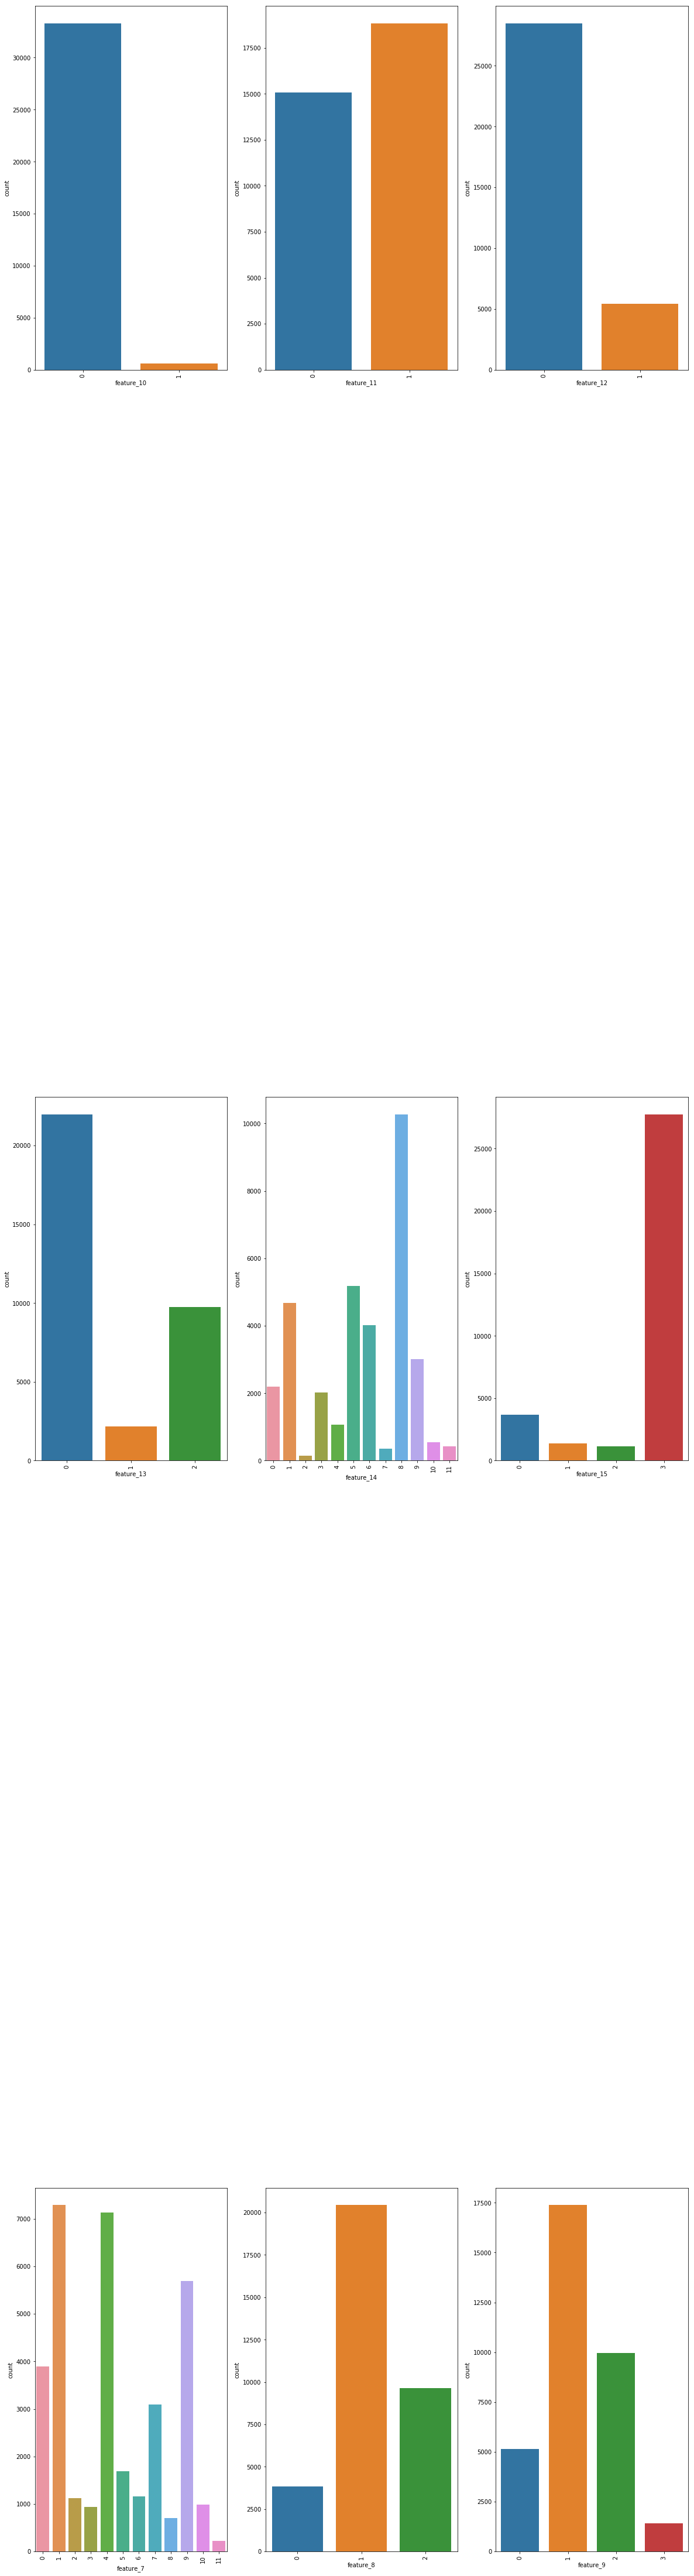

In [23]:
fig, ax = plt.subplots(int(len(discrete)/3), 3, figsize=(20, 80))

fig.subplots_adjust(hspace = 2)

discrete.sort()
for variable, subplot in zip(discrete, ax.flatten()):
    try:
        sns.countplot(df[variable], ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(90)
    except:
        continue

### 3.3 Plot Numercial Variables <a class="anchor" id="chapter3.3"></a>

In [20]:
df[continuous].dtypes.unique()

array([dtype('float64')], dtype=object)

Let's make boxplots to visualise outliers in the continuous variables and histograms to get an idea of the distribution

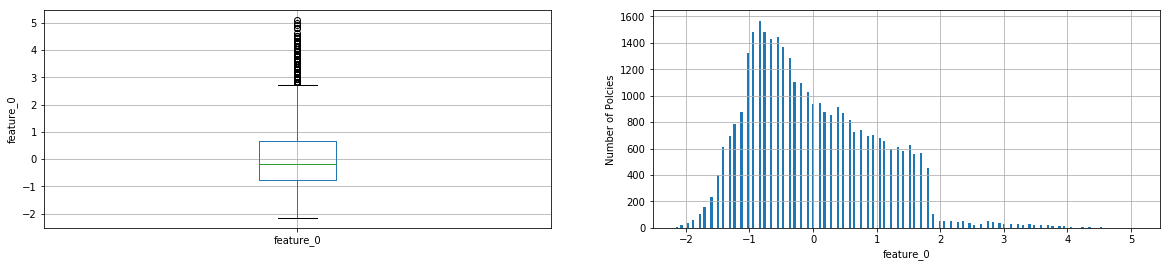

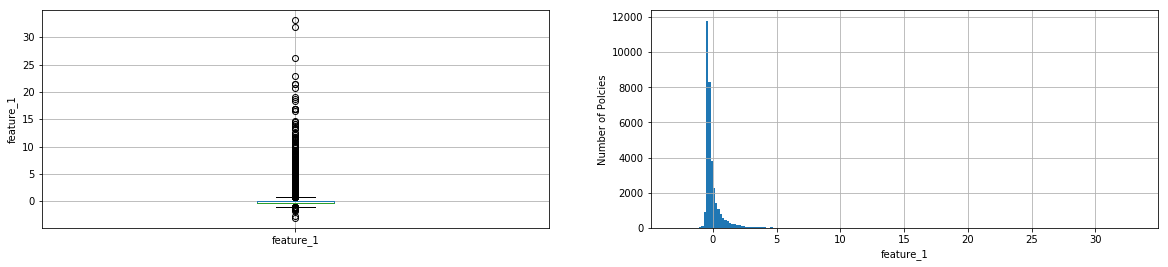

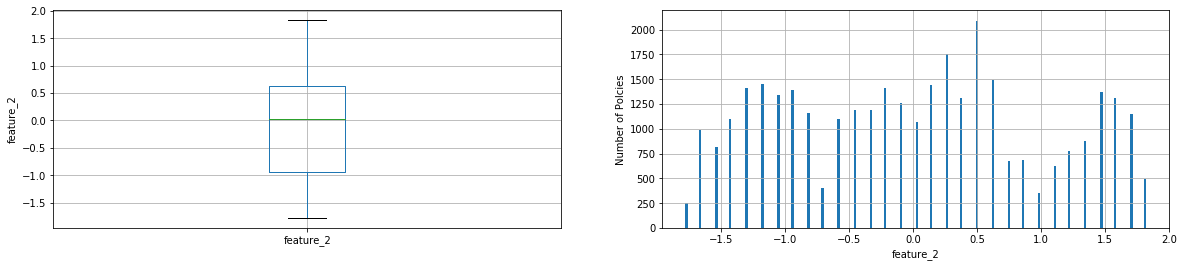

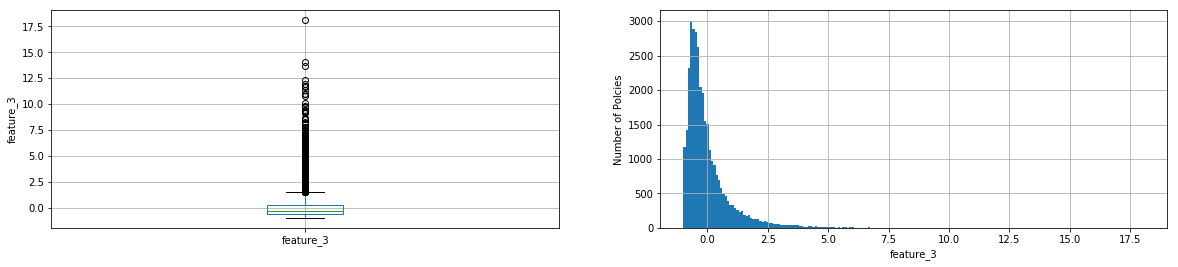

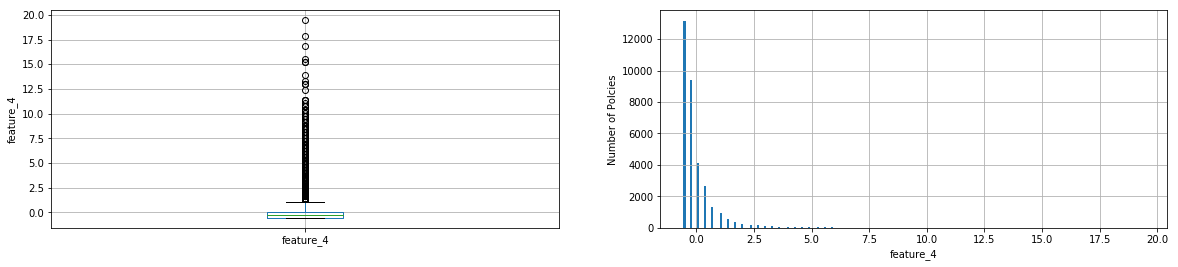

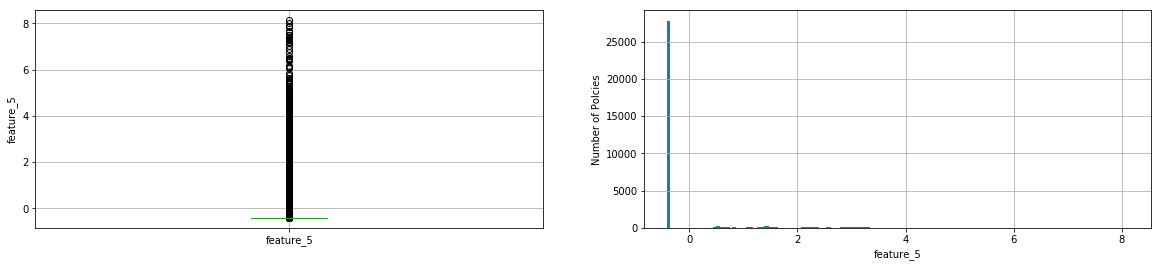

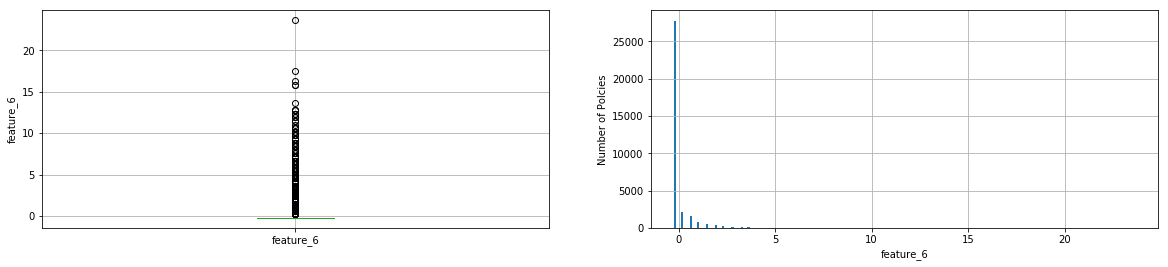

In [24]:
continuous.sort()

for var in continuous:
    plt.figure(figsize=(20,4))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = df[var].hist(bins=200)
    fig.set_ylabel('Number of Polcies')
    fig.set_xlabel(var)

    plt.show()

### 3.4 Plots by target <a class="anchor" id="chapter3.4"></a>

Enhanced visualizations and analysis to check distributions, counts and average target values by each of the variables in the dataset


#### 3.4.1 Average values of the Target Variables

In [25]:
continuous.sort()

for var in categorical:
    
    visualize_tgt_by_categorical(df = df, var = var, target = 'label', color = '#0000FF')

#### 3.4.2 Distribution plots using `sns.distplot`

Target variable analysed: labels 



C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


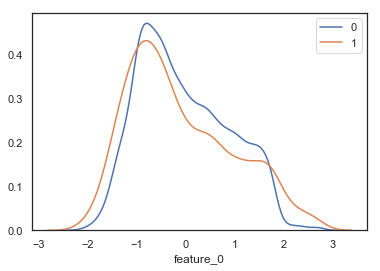

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


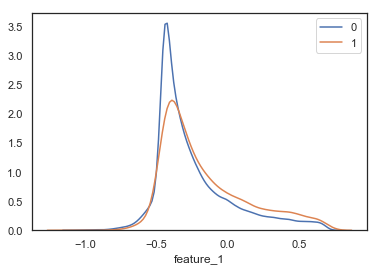

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


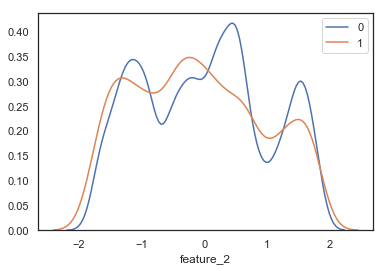

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


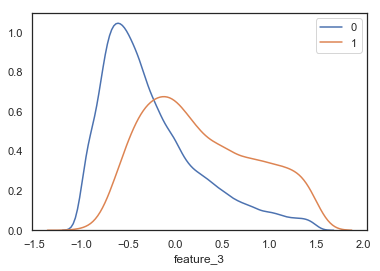

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


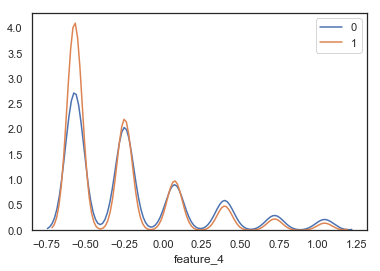

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


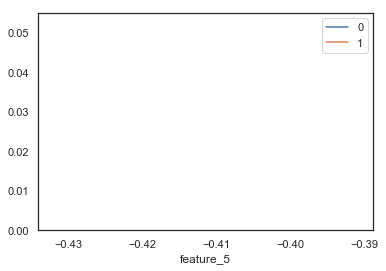

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


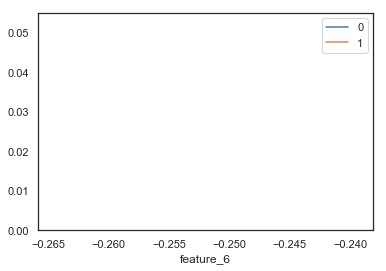

In [25]:
for target in targets:
    
    print(f'Target variable analysed: {target} \n')

    for var in continuous:
            
        try:
            tgt_dist(df = df, 
                     y_var = var, 
                     target = target)
        except:
            continue

#### 3.4.2 Violin plots using `sns.violinplot`

In [26]:
for target in targets:
    
    print(f'Target variable analysed: {target} \n')
    
    for var in continuous:
        try:
            tgt_dist_violin(df = df,
                            y_var = var, 
                            target = target)
            
            plt.show()
            
        except:
            continue

Target variable analysed: labels 



#### 3.4.3 Bar Plots using `sns.barplot`

 Target variable analysed: labels 



C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


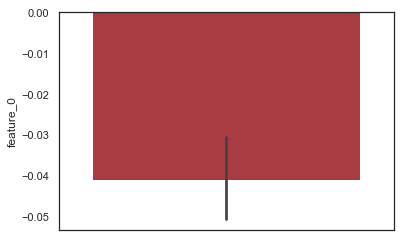

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


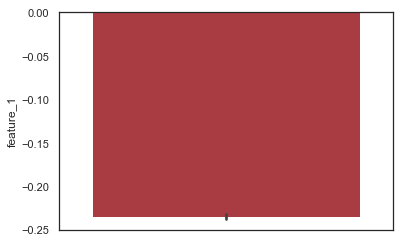

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


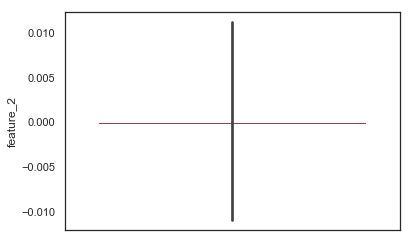

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


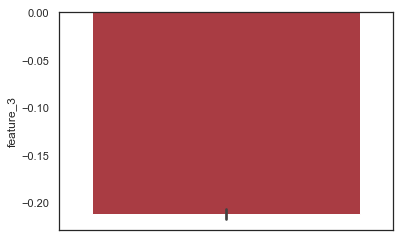

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


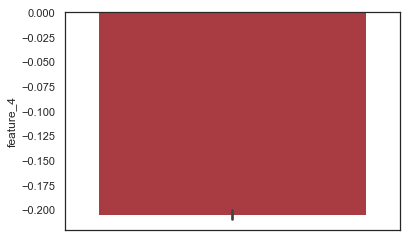

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


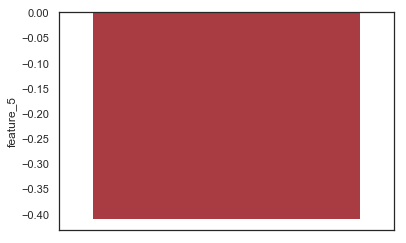

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


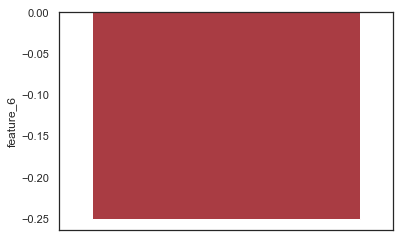

In [27]:
for target in targets:

    print(f'===================================== \n Target variable analysed: {target} \n')
    
    for var in continuous:
        try:
            tgt_dist_barplots(df = df,
                              x_var = "CLA_MES_CARTERA",
                              y_var = var, 
                              target = target)
            
            plt.show()
            
            print('\n ')
        
        except:
            continue

#### 3.4.4 Categorical Variable Plots by target

In [28]:
for target in targets:

    print(f'===================================== \n Target variable analysed: {target} \n')
    
    for var in categorical:
        try:
            
            tgt_dist_countplots(df = df,
                                x_var = var,
                                target = target)
            
            plt.show()
            
            print('\n ')
        
        except:
            continue

 Target variable analysed: labels 



### 3.5 Outlier detection <a class="anchor" id="chapter3.5"></a>

In [29]:
for var in categorical:
    try:
        visualize_outliers(df, var)
        plt.show()
        
    except:
        continue

## 4. Correlation analysis <a class="anchor" id="chapter4"></a>
---
The next section has the objective of analyzing the correlations between the different numerical features of the dataset

In [30]:
df[continuous].columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6'],
      dtype='object')

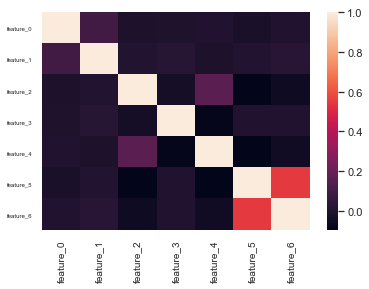

In [31]:
# Calculate correlations
sns.heatmap(df[continuous].corr())

plt.xticks(fontsize=10)
plt.yticks(fontsize=6)


plt.show()

Which variable do you want to analyse?feature_6


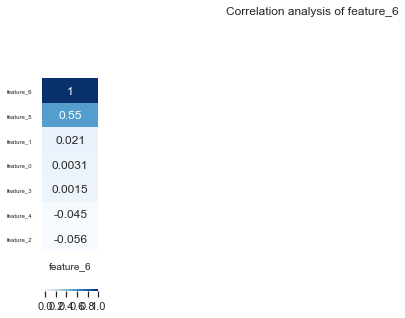

In [32]:
var = input("Which variable do you want to analyse?")
ax  =  plot_correlations(df = df[continuous], var = var)
ax.plot()

plt.show()

In [ ]:
var = input("Which variable do you want to analyse?")
ax  =  plot_unique_figure_correlations(df[continuous], var, type = 'neg')
ax.plot()